In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

os.chdir('C:/Users/mgow/PycharmProjects/DataMiningGroupProjectGit')

In [2]:
df = pd.read_csv('hospitalData.csv')

# build dataframe with just relevant data (omit hospital metadata) and fill NaNs with mean values

outcomes = df[['COMP_HIP_KNEE', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN',
              'MORT_30_STK', 'PSI_10_POST_KIDNEY', 'PSI_11_POST_RESP', 'PSI_12_POSTOP_PULMEMB_DVT', 'PSI_13_POST_SEPSIS',
              'PSI_14_POSTOP_DEHIS', 'PSI_15_ACC_LAC', 'PSI_3_ULCER', 'PSI_4_SURG_COMP', 'PSI_6_IAT_PTX',
              'PSI_8_POST_HIP', 'PSI_90_SAFETY', 'PSI_9_POST_HEM']].fillna(df.mean()).values

# np.savetxt('C:/Users/mgow/Documents/UChicago/Courses/Data Mining/Group Project/outcomesFilled.csv', outcomes, delimiter=',')

surveys = df[['Provider ID', 'H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE', 'H_COMP_2_LINEAR_SCORE', 'H_COMP_3_LINEAR_SCORE',
              'H_COMP_5_LINEAR_SCORE', 'H_COMP_6_LINEAR_SCORE', 'H_COMP_7_LINEAR_SCORE', 'H_HSP_RATING_LINEAR_SCORE',
              'H_QUIET_LINEAR_SCORE', 'H_RECMND_LINEAR_SCORE']].fillna(df.mean()).values

allData = df[['COMP_HIP_KNEE', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN',
              'MORT_30_STK', 'PSI_10_POST_KIDNEY', 'PSI_11_POST_RESP', 'PSI_12_POSTOP_PULMEMB_DVT', 'PSI_13_POST_SEPSIS',
              'PSI_14_POSTOP_DEHIS', 'PSI_15_ACC_LAC', 'PSI_3_ULCER', 'PSI_4_SURG_COMP', 'PSI_6_IAT_PTX',
              'PSI_8_POST_HIP', 'PSI_90_SAFETY', 'PSI_9_POST_HEM', 'H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE', 'H_COMP_2_LINEAR_SCORE', 'H_COMP_3_LINEAR_SCORE',
              'H_COMP_5_LINEAR_SCORE', 'H_COMP_6_LINEAR_SCORE', 'H_COMP_7_LINEAR_SCORE', 'H_HSP_RATING_LINEAR_SCORE',
              'H_QUIET_LINEAR_SCORE', 'H_RECMND_LINEAR_SCORE', 'Number of Completed Surveys', 'Survey Response Rate Percent']]

print(allData)

      COMP_HIP_KNEE  MORT_30_AMI  MORT_30_CABG  MORT_30_COPD  MORT_30_HF  \
0               3.0         14.5           4.5           8.9        12.5   
1               3.0         15.5           NaN          10.9        15.3   
2               3.6         14.9           3.2           8.8        13.2   
3               2.8          NaN           NaN           8.3        13.3   
4               NaN          NaN           NaN           8.0        12.9   
5               2.6         14.1           3.7           8.9        13.1   
6               NaN         16.0           NaN           7.6        13.8   
7               2.2         16.0           3.3           7.1        13.2   
8               NaN          NaN           NaN           NaN         NaN   
9               2.1         14.1           NaN           7.3        13.9   
10              NaN          NaN           NaN           6.4        12.7   
11              NaN          NaN           NaN           7.5        12.6   
12          

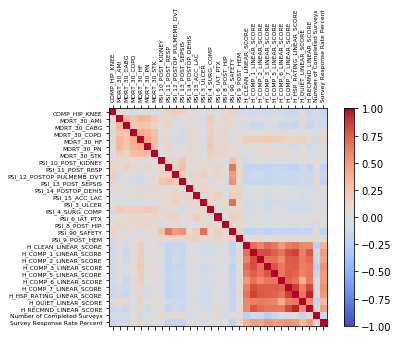

In [3]:
corr = allData.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(allData.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(allData.columns, fontsize=6)
ax.set_yticklabels(allData.columns, fontsize=6)
plt.show()

# Looks like the survey scores are generally highly correlated with each other.
# In addition, the mortality rate outcomes are moderately correlated with each other, and some 
# of the complications have a weak to moderate negative correlation with the survey scores

In [4]:
# standardize and fill NaNs with mean values

filledData = allData.fillna(allData.mean()).values
scaledData = StandardScaler().fit_transform(filledData)

print(filledData)

[[   3.           14.5           4.5        ...   84.
   506.           21.        ]
 [   3.           15.5           3.23017751 ...   88.
  1135.           34.        ]
 [   3.6          14.9           3.2        ...   84.
   579.           22.        ]
 ...
 [   2.59674112   13.17938615    3.23017751 ...   88.08642675
   685.48155156   26.37204352]
 [   2.59674112   13.17938615    3.23017751 ...   92.
  1027.           23.        ]
 [   2.59674112   13.17938615    3.23017751 ...   88.08642675
   685.48155156   26.37204352]]


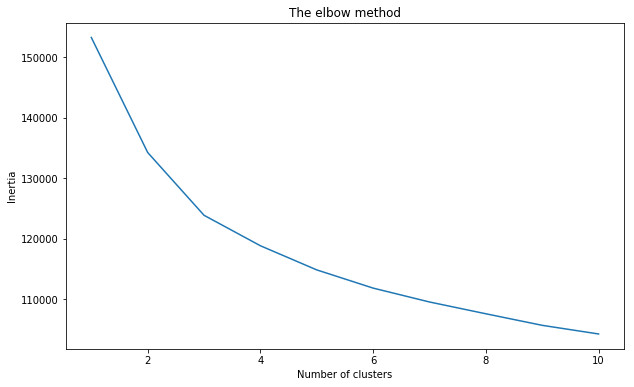

In [5]:
# determine optimal number of clusters

def plot_inertia(array, start=1, end=10):

    inertia = []

    for i in range(start, end + 1):
        kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++')
        kmeans.fit(array)
        inertia.append(kmeans.inertia_)

    x_axis = range(start, end + 1)
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.set_title('The elbow method')
    ax.set_ylabel('Inertia')
    ax.set_xlabel('Number of clusters')
    plt.plot(x_axis, inertia)

    return ax

plot_inertia(scaledData, 1, 10)

# selecting 5 clusters based on plot

In [6]:
# fit and predict kmeans

def kmeans_cluster(array, random_state, n_clusters=5):

    model = KMeans(n_clusters=n_clusters, random_state=random_state)
    clusters = model.fit_predict(array)

    return model, clusters


model, clusters = kmeans_cluster(scaledData, 0, 5)

print(clusters)

[3 0 3 ... 0 0 0]


In [7]:
# rebuild dataframe with provider name and cluster labels

df = pd.read_csv('hospitalData.csv', index_col=0)
df['Clusters'] = clusters

df.groupby('Clusters').mean()

,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,...,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent
Clusters,,,,,,,,,,,,,,,,,,,,,
0,2.630133,13.555302,3.537500,8.618548,12.341723,16.218843,14.571690,1.277415,7.744970,3.677757,...,86.066563,79.147833,87.331269,81.769350,88.202012,82.360681,87.674923,55743.819752,435.315869,26.423678
1,2.498611,13.152604,3.011364,8.399630,12.210152,15.633178,14.509408,1.270581,6.740585,3.577588,...,90.831004,84.209657,90.345616,85.039390,92.167726,87.448539,92.337992,54743.162643,382.452351,33.780178
2,2.729201,13.365873,3.431855,8.561979,11.688889,15.980412,14.523885,1.525469,11.304792,4.511026,...,83.613402,77.778351,86.548969,81.226804,87.752577,80.288660,87.765464,50386.629156,1392.611253,22.790281
3,2.652312,13.258022,3.287591,8.282591,11.125626,15.934528,14.264977,1.289286,8.444709,3.941293,...,80.076923,73.774859,82.545966,77.881801,83.362101,77.043152,81.594747,49864.921201,699.378987,19.469043
4,2.483047,12.333006,2.789836,7.668357,10.209178,14.130857,13.427926,1.248287,6.790760,3.647382,...,84.612476,78.391304,87.361059,82.170132,89.143667,80.860113,89.542533,49687.207477,1533.541353,24.768797


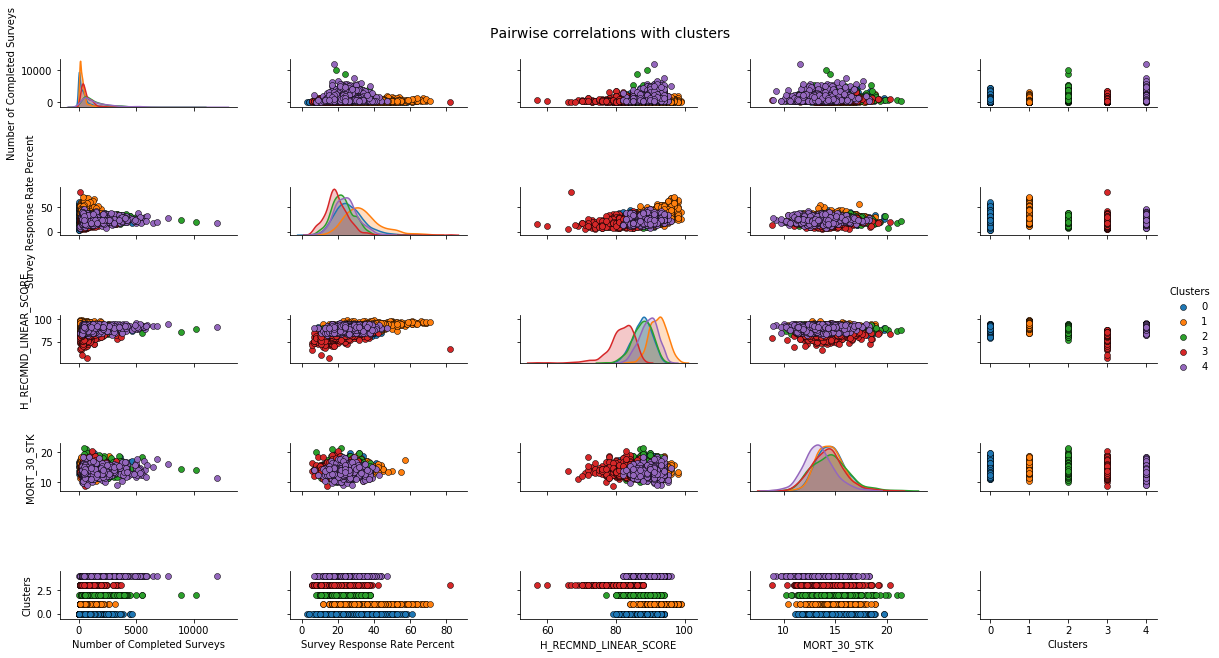

In [11]:
# show scatterplot color coded by cluster
cols = ['Number of Completed Surveys', 'Survey Response Rate Percent', 'H_RECMND_LINEAR_SCORE','MORT_30_STK', 'Clusters']
pp = sns.pairplot(df[cols], hue='Clusters', height=1.8, aspect=1.8, 
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Pairwise correlations with clusters', fontsize=14)

# save df
#df.to_csv(path_or_buf='C:/Users/mgow/Documents/UChicago/Courses/Data Mining/Group Project/KmeansResults.csv')